# 모델 선택, 언더피팅(underfitting), 오버피팅(overfitting)

머신러닝에서 우리의 목표는 일반적인 패턴을 발견하는 것입니다. 예를 들면, 유전자 표지와 성인기의 치매 발병간의 관련성을 배우기를 원할 수 있습니다. 여기서 우리의 원하는 것은 전인류에 대한 위험을 평가하기 위해서 성공적으로 적용될 수 있는 패턴을 발견하는 것입니다.

하지만, 우리가 모델을 학습시킬 때,  전체 인구에 대한 정보를 사용하는 것은 불가능합니다. 대신, 우리는 작은 유한한 샘플만을 사용할 수 있습니다. 대형 병원 시스템에서 조차도 수십만건의 의료 기록 정도를 얻을 수도 있습니다. 이렇게 한정된 표본의 크기를 감안하면, 보이지 않은 데이터에 존재하는 않는 가짜 연관성을 발견할 수 있습니다.

극단적인 병리학적 사례를 생각해보겠습니다. 어떤 사람들이 대출금을 상환할 것인지를 예측하는 것을 배우기를 원한다고 상상해보십시오. 대출 기관이 케이스를 조사하기 위해서 당신을 데이터 과학자로 고용해서, 100명의 지원자에 대한 완전한 파일을 제공합니다. 100명의 지원자 중에 5명이 3년간 채무 불이행을 했었습니다. 제공된 파일에는 수입, 직업, 신용점수, 취업 기간 등을 포함한 100여개의 특성(feature)들이 있습니다. 더불어 대출기관과의 인터뷰 비디오를 추가로 제공한다고 상상해보겠습니다. 이것들이 아주 많은 데이터처럼 보일 수 있습니다!

엄청난 양의 특성(feature) 세트를 만든 후, 채무 불이행을 한 5명이 모두 인터뷰 중에 파란 셔츠를 입었다는 것을 발견했다고 가정하겠습니다. 반면에 일반 인구의 40%만이 파란 셔츠를 입었습니다. 여러분이 학습시킨 모델이 이 신호를 포착해서, 학습한 패턴의 중요한 부분으로 사용할 가능성이 큽니다.

채무 불이행자가 더 이상 파란 셔츠를 입지 않을지라도, 모든 5명의 채무 불이행자가 파란 셔츠를 입을 것이라고 관찰할 확률이 1% 입니다. 수백 또는 수천개의 특성(feature)들을 가지고 있으면서 샘플의 크기를 작게 유지한다면, 아주 많은 가짜 상관 관계를 관찰할 것입니다. 수조개의 학습 샘플이 주어진다면, 이 잘못된 연관성은 사라질 것입니다. 하지만, 실제 그렇게 많은 데이터를 얻을 수 있는 경우가 드뭅니다.

모델이 실제 분포보다 학습 샘플들 분포에 더 근접하게 학습되는 현상을 오버피팅(overfitting) 이라고 하며, 오버피팅(overfitting)을 피하는 방법을 정규화(regularization)라고 합니다. 더 정확하게는 이전 절의 Fashion-MNIST 데이서셋에서 이 현상이 나왔었습니다. 실험 중에 모델의 구조나 하이퍼파라미터(hyperparameter)들을 바꾸면, 어떤 조합에서는 모델이 학습 데이터와 비교해서 테스팅 데이터셋을 사용했을 때 정확하지 않게 나오는 현상을 찾아냈을 수 있습니다.

## 학습 오류와 일반화 오류

이 현상에 대해서 설명하기 전에, 학습 오류와 일반화 오류에 대해서 구분할 필요가 있습니다. Layman의 용어에 의하면, 학습 오류는 학습 데이터셋을 사용했을 때 나오는 오류이고, 일반화 오류는 기본 데이터 분포에서 추가로 데이터를 뽑아낸 가상의 스트림에 모델을 적용할 때 예상되는 오류를 의미합니다. 종종 일반화 오류는 테스트 셋에 모델을 적용해서 추정합니다. 예를 들면, 이전에 논의한 손실 함수(loss function)들 중에 선형회귀에 사용된 제곱 손실 함수(squared loss function)나 softmax 회귀(regression)에 사용된 크로스-엔트로피 손실 함수(cross-entropy loss function)를 이용해서 학습 오류와 일반화 오류 비율을 계산할 수 있습니다.

다음 세가지 사고 실험이 이 상황을 더 잘 설명하는데 도움이 될 것입니다. 학기말 시험을 준비하는 대학생을 생각해봅시다. 근면한 학생은 준비를 잘 하고, 이전 년도의 시험 문제를 통해서 본인의 능력을 테스트하는 등의 노력할 것입니다. 하지만, 이전 시험을 잘 푸는 것이 꼭 그 학생이 실제 시험을 잘 본다는 것을 보장하지는 못합니다. 예를 들면, 그 학생은 시험 문제의 답을 기계적으로 학습하면서 준비하려고 노력 할지도 모릅니다. 이렇게 하면 그 학생은 많은 것을 외워야 합니다. 이렇게 해서 그 학생은 이전 시험의 답을 완벽하게 암기할 수도 있습니다. 반면에, 다른 학생은 문제에 대한 특정 답이 나오게되는 이유를 이해하려고 노력하면서 준비했습니다. 대부분의 경우에는, 후자의 경우에 실제 시험에서 더 좋은 성적을 냅니다.

마찬가지로, 질문에 대한 답을 테이블에서 조회하는 역할을 수행하는 모델을 생각해 보겠습니다. 입력이 이산적(discrete)인 경우, 많은 샘플을 보는 것을 통해서 잘 동작할 수 있습니다. 하지만, 이 모델은 데이터가 실수값이거나 우리가 원하는 것보다 더 부족한 경우 실제 상황에서는 잘 동작하지 않을 가능성이 높습니다. 더군다나, 우리는 모델을 저장할 수 있는 한정된 양의 메모리만 가지고 있습니다.

마지막으로, 간단한 분류 문제를 고려해보겠습니다. 공정한 동전을 던져서 앞면이 나오면 0, 뒷면이 나오면 1로 분류한 레이블을 갖는 학습 데이터가 있습니다. 우리가 무엇을 하던지 상관없이, 일반화 오류는 항상  $\frac{1}{2}$ 입니다. 하지만, 학습 오류는 동전을 던지는 운에 따라서 더 작아질 수 있습니다. 예를 들어 {0, 1, 1, 1, 0, 1}인 학습 데이터를 사용하는 경우에는, 1을 예측한다면,  $\frac{1}{3}$  의 오류가 발생하는데, 이는 실제 보다 더 좋은 값입니다. 데이터 양을 늘릴 수록,  확률의 편차가 $\frac{1}{2}$ 로 부터 감소하고, 학습 오류도 이에 근접하게될 것입니다. 그 이유는 우리의 모델이 데이터에 오버핏(overfit) 되어 있고, 데이터의 양을 늘리면 모든것이 평균상태가 되기 때문입니다.

### 통계적 학습 이론(statistical learning theory)

이 현상에 대한 공식 이론이 있습니다. Glivenko와 Cantelli는 그들의  [eponymous theorem](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem)에서 학습 오류가 일반화 오류로 수렴하는 비율을 도출했습니다. [Vapnik와 Chervonenkis](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_theory)는 여러 논문을 통해서 이것을 더 일반적인 함수의 클래스들로 확장했고, [Statistical Learning Theory](https://en.wikipedia.org/wiki/Statistical_learning_theory)의 기초가 되었습니다.

특별히 이야기하지 않으면, 학습 데이터셋과 테스트 데이터셋은 동일한 분포로 부터 독립적으로 추출되었다고 가정합니다. 즉, 이 분포로부터 추출을 할 때, 추출들 간의 어떤 기억도 없다는 것을 의미합니다. 더 나아가, 두 경우 모두 동일한 분포를 사용하는 것을 의미합니다. 이를 위반하는 명확한 사례로 초등학교 학생들의 얼굴 데이터로 학습한 얼굴 인식 모델을 이용해서 일반 인구에 적용하는 것을 들 수 있습니다. 초등학교 학생들과 일반 사람들은 아주 다르게 보일 것이기 때문에 잘 동작하지 않을 가능성이 높습니다. 학습을 통해서 우리는 학습 데이터에 잘 맞는 함수를 찾으려고 노력합니다. 만약 학습 데이터의 자세한 것에 아주 잘 적응할 정도로 유연하다면, 지나치게 잘하게 될 것입니다. 이것이 바로 우리가 피하려고 또는 통제하려는 것입니다. 대신, 우리는 일반화 오류를 줄이는 모델을 찾는 것을 원합니다. 딥러닝의 많은 튜닝은 이런 것이 일어나지 않도록 하는데 이용됩니다.

### 모델 복잡도

우리는 간단한 모델들과 많은 데이터가 있을 경우, 일반화 오류가 학습 오류와 비슷해 지기를 예상합니다. 반면에 모델이 복잡하고 데이터가 적을 때는, 학습 오류는 작아지지만, 일반화 오류는 커질 것을 예상합니다. 무엇이 정확하게 모델의 복잡성을 구성하는지는 복잡한 문제입니다. 모델이 일반화를 잘 할 수 있을지는 많은 것들에 의해서 영향을 받습니다. 예를 들면, 더 많은 파라미터를 갖는 모델이 더 복잡하다고 여기질 수 있고, 값의 범위가 더 넓은 파라미터를 갖는 모델이 더 복잡하다고 여겨질 수도 있습니다. 뉴럴 네트워크의 경우에는 학습을 더 오래한 모델이 더 복잡한 것이라고 생각될 수도 있고, 일찍 학습을 종료한 모델은 덜 복잡하다고 생각될 수도 있습니다.

다양한 모델 종류들 간의 복잡성을 비교하는 것은 어려운 일 수 있습니다. 예를 들면 결정 트리(decision tree)와 뉴럴 네트워크의 복잡성을 비교하는 것은 어렵습니다. 이런 경우, 간단한 경험의 법칙을 적용하는 것이 유용합니다. 통계학자들은 임의의 사실을 잘 설명하는 모델을 복잡하다고 하고, 제한적인 설명을 하는 능력을 갖으나 데이터를 여전히 잘 설명하는 모델은 진실에 좀 더 가깝다고 합니다.  철학에서 이것은 포퍼의 과학 이론의 허위 진술성([falsifiability](https://en.wikipedia.org/wiki/Falsifiability))과 밀접한 관련이 있습니다. 어떤 이론이 데이터에 적합하고, 오류를 입증할 수 있는 특정 테스트가 있다면, 그 이론을 좋다고 합니다. 모든 통계적 추정이 [post-hoc](https://en.wikipedia.org/wiki/Post_hoc)이기에 이는 매우 중요합니다. 즉, 우리는 어떤 사실을 관찰한 후에 추정을 합니다. 따라서, 관련 오류에 취약하게 됩니다. 자, 철학에 대해서는 충분히 이야기했으니, 더 구체적인 이슈를 살펴보겠습니다.

여러분이 이 장에 대한 직관을 가질 수 있도록, 모델 클래스의 일반화에 영향을 줄 수 있는 몇 가지 요소들에 집중하겠습니다.

1. 튜닝이 가능한 파라미터의 개수. 자유도라고 불리기도 하는 튜닝 가능한 파라미터의 수가 많을 경우, 모델이 오버피팅(overfitting) 에 더 취약한 경향이 있습니다.
1. 파라미터에 할당된 값. 가중치들이 넓은 범위의 값을 갖을 경우, 모델은 오버피팅(overfitting)에 더 취약할 수 있습니다.
1. 학습 예제의 개수. 모델이 간단할 지라도 학습 데이터가 한 개 또는 두 개인 경우에는 오버핏(overfit) 되기가 아주 쉽습니다. 하지만, 수백만개의 학습 데이터를 이용해서 모델을 오버피팅(overfitting) 시키기 위해서는 모델이 아주 복잡해야 합니다.

## 모델 선택

머신러닝에서, 우리는 보통 여러 후보 모델들의 성능을 평가해서 모델을 선정합니다. 이 과정을 모델 선택 (model selection)이라고 합니다. 후보 모델들은 다른 하이퍼파라미터(hyper-parameter)들을 적용한 간단한 모델들일 수 있습니다. 다층 퍼셉트론(multilayer perceptron)을 예로 들면, 우리는 은닉층(hidden layer)의 개수, 은닉 유닛(hidden unit)의 개수, 각 은닉층(hidden layer)의 활성화 함수(activation function)를 선택할 수 있습니다. 효과적인 모델을 찾기 위해서는 모델 선택에 상당한 노력이 필요합니다. 다음 절에서 모델 선택에 종종 사용되는 검증 데이터셋 (validation data set)에 대해서 설명하겠습니다.

### 검증 데이터셋 

엄밀하게 이야기하면, 테스트 셋은 모든 하이퍼파라미터(hyper-parameter)들과 모델 파라미터들이 선택된 후에만 사용되어야 합니다. 특히, 테스트 데이터셋은 하이퍼파라미터(hyper-parameter) 선택과 같은 모델 선택 과정에서 사용되서는 안됩니다. 모델 선택 과정에서 학습 데이터에만 의존해서도 안됩니다. 그 이유는 일반화 오류율이 학습 오류율로 예상될 수 없기 때문입니다. 이를 고려해서, 학습 데이터와 테스트 데이터 이외의 데이터를 확보해서 모델 선택에 사용할 수 있습니다. 이렇게 확보한 데이터는 검증 데이터 셋(validation data set) 또는 검증셋(validation set)이라고 합니다. 예를 들면, 학습 데이터에서 임의로 선택한 일부의 데이터를 검증 셋으로 사용하고, 나머지를 실제 학습 데이터로 사용할 수 있습니다.

하지만, 실제 응용의 경우에는 테스트 데이터를 구하기 어렵기 때문에 한 번 사용하고 버리는 경우가 드뭅니다. 따라서, 실제의 경우에는 검증 데이터와 테스트 데이터 셋의 구분이 명확하지 않을 수도 있습니다. 명시적으로 별도로 언급하지 않는 경우 이 책에서 실험으로 사용하는 테스트 데이터셋은 검증 데이터 셋이라고 하고, 실험 결과의 테스트 정확도는 검증 정확도를 의미하겠습니다. 좋은 소식은 검증 셋에 아주 많은 데이터가 필요하지 않다는 것입니다. 우리의 예측의 불명확성은  $O(n^{-\frac{1}{2}})$ 오더로 보여질 수 있습니다.


### $K$-겹 교차 검증($K​$-Fold Cross-Validation)

학습 데이터가 충분하지 않을 경우 검증 데이터를 많이 확보하는 것은 과하다고 간주됩니다. 왜냐하면, 검증 데이터는 모델 학습에 어떤 역할도 할 수 없기 때문입니다. 이에 대한 해결책으로 $K$-겹 교차 검증($K$-Fold Cross-Validation) 방법이 있습니다.   에$K$-겹 교차 검증($K$-Fold Cross-Validation)에서는 원래 학습 데이터를 겹치지 않는 K개의 부분 데이터셋으로 나누고, 모델 학습과 검증을  $K$ 번 반복합니다. 검증이 수행될 때마다  $K-1$ 개의 부분 데이터셋으로 학습을 하고, 1개의 부분 데이터셋으로 검증을 수행합니다. 모델을 검증하는데 사용하는 부분 데이터셋은 계속 바꾸면서 $K$ 번 학습과 검증을 수행하게 됩니다. 마지막으로, $K$ 번의 학습과 검증 오류에 대한 평균을 각각 구합니다.


## 언더피팅(underfitting)과 오버피팅(overfitting)

다음으로는 모델 학습을 진행하면서 만나게 되는 일반적인 두가지 문제에 대해서 살펴보겠습니다. 첫번째 문제는 모델이 너무 간단하기 때문에 학습 오류가 줄어들지 않는 것입니다. 이 현상을 언더피팅(underfitting) 이라고 합니다. 두번째 문제는 앞에서 이야기했던 오버피팅(overfitting)으로, 이는 학습 오류가 테스트 데이터셋에 대한 오류보다 아주 작은 경우입니다. 실제로 이 두 문제는 가능한 경우 항상 동시에 해결이 되어야 합니다. 이 두 문제의 원인은 여러 요소들이 있지만, 여기서는 두 가지 요소에 대해서 집중하겠습니다. 이 두가지는 모델 복잡성과 학습 데이터셋의 크기입니다.

### 모델 복잡도

이 이슈를 설명하기 위해서 다항식을 예로 들겠습니다. 스칼라 데이터 특성(feature) $x$ 와 이에 대한 스칼라 레이블(label) $y$  로 구성된 학습 데이터가 주어진 경우, $y$ 를 추정하는 $d$ 차원 다항식을 찾는다고 하겠습니다.

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

여기서  $w_i$ 는 모델의 가중치 파라미터를 의미하고, 편향(bias)은 $x^0 = 1$ 이기 때문에  $w_0$ 이 됩니다. 간단하게 하기 위해서, 선형 회귀(linear regression)의 경우와 같이 제곱 손실(squared loss)을 사용하겠습니다. (사실 $d=1$ 인 경우 이 모델은 선형 회귀(linear regression) 입니다.)

고차원의 다항 함수는 저차원의 다항 함수보다 더 복잡합니다. 이유는 차원이 더 높아지면, 더 많은 파라미터를 갖게 되고, 모델 함수의 선택 범위가 더 넓어지기 때문입니다. 따라서, 같은 학습 데이터셋을 사용하는 경우, 더 높은 차원의 다항 함수에 대한 학습 오류는 그보다 낮은 차원의 다항 함수의 오류보다 낮을 것입니다. 이를 염두하면, 학습 데이터셋이 고정되어 있을 때 모델의 복잡도와 오류의 일반적인 상관관계는 아래 그림으로 설명됩니다. 데이터에 비해서 모델이 너무 간단하면, 언더피팅(underfitting)이 발생하고, 모델을 너무 복잡하게 선택하면 오버피팅(overfitting)이 발생합니다. 데이터에 대한 모델을 적절한 복잡성을 선택하는 것이 오버피팅(overfitting)과 언더피팅(underfitting) 문제를 피하는 방법 중에 하나입니다.


![Influence of Model Complexity on Underfitting and Overfitting](../img/capacity_vs_error.svg)

### 데이터셋의 크기

다른 원인은 학습 데이터의 양입니다. 일반적으로 학습 데이터셋의 샘플 개수가 충분하지 않은 경우, 특히 모델의 파라미터 개수보다 적은 수의 샘플을 사용하는 경우, 오버피팅(overfitting) 이 쉽게 발생합니다. 학습 데이터의 양을 늘리면, 일반화 오류는 일반적으로 줄어듭니다. 즉, 더 많은 데이터는 모델 학습에 나쁜 영향을 미치지 않다는 것을 의미합니다. 더 나아가서, 이는 충분한 데이터가 있다면, 일반적으로 많은 층들을 갖는 복잡한 모델을 사용해야한다는 것을 의미합니다.


## 다항식 회귀(Polynomial Regression)

데이터를 이용해서 다항식을 학습시켜 보면서 이것이 어떻게 동작하는지 보겠습니다. 우선 몇가지 모듈을 import 합니다.

In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

### 데이터셋 생성하기

우선 데이터가 필요합니다. 주어진 $x$ 에 대해서, 다음 3차원 방정식을 사용해서 학습 데이터와 테스트 데이터로 사용할 레이블(label) 만들겠습니다.

$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0,0.1)$$

노이즈 항인  $\epsilon$ 은 평균이 0이고 표준 편차가 0.1인 정규 분포를 따릅니다. 학습과 테스트 데이터셋의 샘플의 개수는 각각 100개, 1000개로 하겠습니다.

In [2]:
maxdegree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 1000  # Training and test data set sizes
true_w = nd.zeros(maxdegree)  # Allocate lots of empty space
true_w[0:4] = nd.array([5, 1.2, -3.4, 5.6])

features = nd.random.normal(shape=(n_train + n_test, 1))
features = nd.random.shuffle(features)
poly_features = nd.power(features, nd.arange(maxdegree).reshape((1, -1)))
poly_features = poly_features / (
    nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)))
labels = nd.dot(poly_features, true_w)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

최적화를 위해서, 그래디언트(gradient), 손실(loss) 등이 큰 값을 갖는 것을 피해야합니다. `poly_features` 에 저장되는 단항들이 $x^i$ 에서 $\frac{1}{i!} x^i$ 로 스케일을 조정하는 이유입니다. 이렇게 하면 큰 차원 $i$ 의 값들이 아주 커지는 것을 방지할 수 있습니다. 팩토리얼은 Gluon의 Gamma 함수를 이용해서 구현합니다. ( $n! = \Gamma(n+1)$)

생성된 데이터 셋에서 처음 두 샘플을 확인해봅니다. 값 1도 기술적으로 보면 하나의 특성(feature)으로, bias에 대한 상수 특성(feature)라고 볼 수 있습니다.

In [3]:
features[:2], poly_features[:2], labels[:2]

(
 [[-0.5095612 ]
  [ 0.34202248]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 1.00000000e+00 -5.09561181e-01  1.29826277e-01 -2.20514797e-02
    2.80914456e-03 -2.86286173e-04  2.43133891e-05 -1.76987987e-06
    1.12732764e-07 -6.38269260e-09  3.25237282e-10 -1.50662070e-11
    6.39762874e-13 -2.50767950e-14  9.12725858e-16 -3.10059752e-17
    9.87465261e-19 -2.95984643e-20  8.37901598e-22 -2.24716890e-23]
  [ 1.00000000e+00  3.42022479e-01  5.84896803e-02  6.66826218e-03
    5.70173899e-04  3.90024616e-05  2.22328640e-06  1.08630559e-07
    4.64426186e-09  1.76493528e-10  6.03647601e-12  1.87691835e-13
    5.34956872e-15  1.40744067e-16  3.43840286e-18  7.84007342e-20
    1.67592618e-21  3.37178999e-23  6.40682210e-25  1.15330363e-26]]
 <NDArray 2x20 @cpu(0)>, 
 [3.8980482 5.3267784]
 <NDArray 2 @cpu(0)>)

### 모델 정의, 학습, 그리고 테스트

우선 그래프를 그리는 함수 `semilogy`  를 정의합니다. $y$ 축은 로그(logarithm) 단위를 사용합니다.

In [4]:
# This function has been saved in the d2l package for future use
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

선형 회귀(Linear regression)와 비슷하게, 다항 함수 학습에 제곱 손실 함수(squared loss function)를 이용하겠습니다. 생성된 데이터를 이용해서 여러 복잡도를 갖는 모델들을 학습시킬 것이기 때문에, 모델 정의를 `fit_and_plot` 함수에 전달하도록 하겠습니다. 다항 함수에 대한 학습과 테스트 단계는 softmax 회귀(regression)와 비슷합니다.

In [5]:
num_epochs, loss = 200, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy())

### 3차 다항 함수 피팅(Third-order Polynomial Function Fitting (Normal))

우선, 데이터를 생성한 것과 같은 3차원 다항함수를 이용해보겠습니다. 테스트 데이터를 이용해서 얻은 모델의 오류는 낮게 나오는 것이 보여집니다.  학습된 모델 파라미터 역시 실제 값  $w = [5, 1.2, -3.4, 5.6]$ 과 비슷합니다.

final epoch: train loss 0.004533176 test loss 0.0051397462
weight: [[ 4.9952383  1.2209989 -3.3927655  5.5615892]]


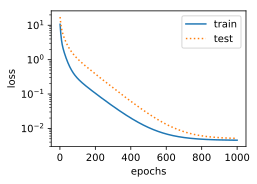

In [6]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x, x^2, x^3 from the polynomial
# features
fit_and_plot(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
             labels[:n_train], labels[n_train:])

### 선형 함수 피팅 (언더피팅, underfitting)

선형 함수의 경우를 보겠습니다. 초기 에포크(epoch)를 수행하면서 학습 오류가 감소한 후로 더 이상 모델 학습의 오류가 감소하지 않는 것은 자연스러운 현상입니다. 마지막 epoch까지 마친 후에도 학습 오류는 여전히 높습니다. 선형 모델은 비선형 모델 (3차 다항 함수)로 만들어진 데이터 셋에 대해서 언더피팅(underfitting)에 민감합니다.

final epoch: train loss 0.8632308 test loss 3.348645
weight: [[ 4.926521   3.3803792 -2.6728134]]


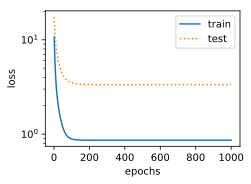

In [7]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x from the polynomial features
fit_and_plot(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3],
             labels[:n_train], labels[n_train:])

### 부족한 학습 (오버피팅, overfitting)

실제 상황에서, 데이터를 생성할 때 사용한 것과 같은 3차 다항 함수를 이용할 경우에도 학습을 충분히 오래하지 않은 경우에는 오버핏(overfit)이 쉽게 발생할 수 있습니다. 아주 높은 차원의 다항식을 사용해서 모델을 학습시켜보겠습니다. 모든 높은 차수의 계수들이 0에 가깝다는 사실을 학습하기에는 데이터가 너무 적습니다. 이 경우에는 모델이 너무 복잡해서 학습 데이터의 노이즈에 쉽게 영향을 받는 결과가 나옵니다. 학습 오류가 낮을지라도, 테스트 오류는 여전히 높습니다.

다른 모델의 복잡도 (`n_degreee`)와 학습 셋 크기(`n_subset`)를 적용해서 어떤 일이 발생하는지에 대한 직감을 얻어보세요.

final epoch: train loss 0.00519606 test loss 0.03169766
weight: [[ 4.9597306e+00  1.2577770e+00 -3.2017288e+00  5.2781725e+00
  -6.3611478e-01  1.3321737e+00 -1.6377112e-02  2.0419005e-01
  -6.1862208e-02  5.8488429e-02 -3.7163019e-02 -6.7995526e-02
   3.7113760e-02 -1.9592606e-02  6.2177841e-02  3.2198679e-02
   3.4999892e-02 -4.5971844e-02 -2.2483468e-02  2.9451251e-03]]


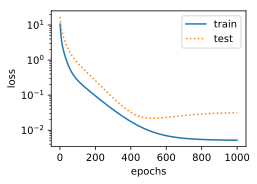

In [8]:
num_epochs = 1000
n_subset = 100  # Subset of data to train on
n_degree = 20   # Degree of polynomials
fit_and_plot(poly_features[1:n_subset, 0:n_degree],
             poly_features[n_train:, 0:n_degree], labels[1:n_subset],
             labels[n_train:])

다음 장들에서 오버피팅(overfitting) 문제들을 계속 논의하고, 이를 해결하기 위한 가중치 감쇠(weight decay)와 드롭아웃(dropout) 과 같은 방법을 알아보겠습니다.

## 요약

* 일반화 오류율은 학습 오류율을 이용해서 추정될 수 없기 때문에, 단순히 학습 오류율을 줄이는 것이 일반화 오류를 줄이는 것을 의미하지 않습니다. 머신 러닝 모델은 일반화 오류를 줄이기를 통해서 오버피팅(overfitting)에 조심스럽게 대비 해야합니다.
* 검증 셋은 모델 선택에 사용됩니다. (너무 남용되지 않는다는 가정에서)
* 언더피팅(underfitting) 은 모델이 학습 오류를 줄이지 못하는 상황을 의미하고, 오버피팅(overfitting)은 모델 학습 오류가 테스트 데이터의 오류보다 훨씬 작은 경우를 의미합니다.
* 우리는 적절한 모델의 복잡성을 선택해야하고, 부족한 학습 샘플을 이용하는 것을 피해야합니다.

## 문제

1. 다항 회귀 문제를 정확하게 풀 수 있나요? 힌트 - 선형대수를 이용합니다.
1. 다항식에 대한 모델 선택에 대해서
    - 학습 오류와 모델 복잡도(다항식의 차원 수)를 도식화해보세요. 무엇이 관찰되나요?
    - 이 경우 테스트 오류를 도식화해보세요.
    - 같은 그래프를 데이터 양에 따라서 그려보세요.
1. 다항식의 특성(feature)  $x^i$ 에 적용한 정규화 $1/i!$ 를 제거하면 어떤 일이 일어날까요? 다른 방법으로 이를 해결할 수 있나요?
1. 학습 오류를 0으로 줄이기 위해서 몇 차원을 사용하나요?
1. 일반화 오류를 0으로 줄이는 것이 가능한가요?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2341)

![](../img/qr_underfit-overfit.svg)